In [1]:
from cv2 import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

print(cv.__version__)

4.1.2


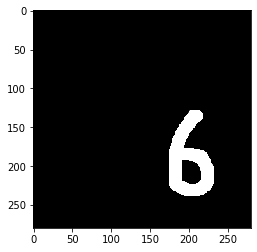

In [2]:
img = cv.imread('6.jpeg', cv.IMREAD_GRAYSCALE)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

row: 128~239, col: 168~231


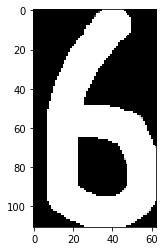

In [3]:
(row, col) = img.shape

row_top = 0
row_bottom = 0
col_top = 0
col_bottom = 0

for r in range(0, row):
    if img.sum(axis=1)[r] > 0:
        row_top = r
        break
    
for r in range(row-1, 0, -1):
    if img.sum(axis=1)[r] > 0:
        row_bottom = r
        break

for c in range(0, col):
    if img.sum(axis=0)[c] > 0:
        col_top = c
        break
        
for c in range(col-1, 0, -1):
    if img.sum(axis=0)[c] > 0:
        col_bottom = c
        break

print(f"row: {row_top}~{row_bottom}, col: {col_top}~{col_bottom}")
new_img = img[row_top:row_bottom, col_top:col_bottom]

plt.imshow(cv.cvtColor(new_img, cv.COLOR_BGR2RGB))

width: 63, height: 111


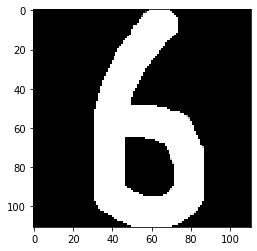

In [4]:
width = col_bottom - col_top
height = row_bottom - row_top
margin = int(abs(width - height)/2)

if width > height:
    new_img = cv.copyMakeBorder(new_img, margin, margin, 0, 0, cv.BORDER_CONSTANT)
elif width < height:
    new_img = cv.copyMakeBorder(new_img, 0, 0, margin, margin, cv.BORDER_CONSTANT)

print(f"width: {width}, height: {height}")
plt.imshow(cv.cvtColor(new_img, cv.COLOR_BGR2RGB))

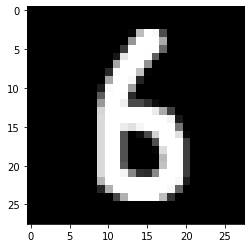

In [5]:
new_img = cv.resize(new_img, (22, 22), interpolation=cv.INTER_AREA)
new_img = np.pad(new_img, pad_width=3, mode='constant', constant_values=0)
plt.imshow(cv.cvtColor(new_img, cv.COLOR_BGR2RGB))